In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Salary_dataset.csv')

In [3]:
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [4]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
df.drop("Unnamed: 0", axis=1,inplace=True)


In [6]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

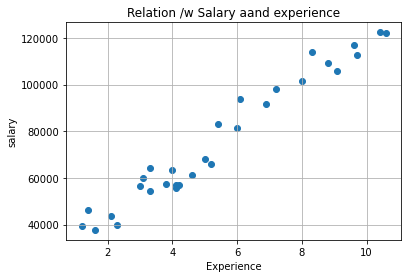

In [9]:
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.title('Relation /w Salary aand experience')
plt.xlabel('Experience')
plt.ylabel('salary')
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X=df['YearsExperience']
y=df['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.shape

(21,)

In [12]:
X_test

27     9.7
15     5.0
23     8.3
17     5.4
8      3.3
9      3.8
28    10.4
24     8.8
12     4.1
Name: YearsExperience, dtype: float64

In [13]:
y_train.shape

(21,)

In [14]:
y_test.shape

(9,)

In [15]:
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(21, 1)
(21, 1)
(9, 1)


In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr

LinearRegression()

In [17]:
y_pred=lr.predict(X_test)
y_pred

array([[115574.62288352],
       [ 71680.93878159],
       [102499.90847018],
       [ 75416.57147111],
       [ 55804.4998511 ],
       [ 60474.04071301],
       [122111.98009019],
       [107169.44933209],
       [ 63275.76523015]])

In [18]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rse=np.sqrt(mse)
print('r2',r2)
print('mae',mae)
print('mse',mse)
print('rse',rse)

r2 0.9414466227178215
mae 5161.328710400178
mse 37784662.46621308
rse 6146.9230079945755


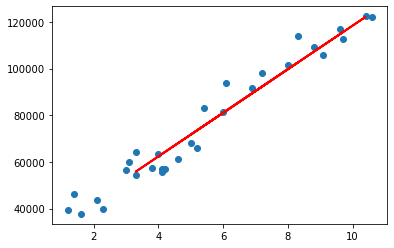

In [19]:
plt.scatter(x=df['YearsExperience'], y=df['Salary'])
plt.plot(X_test, y_pred, color='red', linewidth=2,)

In [20]:
new_experience = 6.6
new_experience_array = np.array([[new_experience]])  # Reshape to a 2D array

# Make a prediction
predicted_salary = lr.predict(new_experience_array)

print(predicted_salary)

[[86623.46953969]]
